**PROBLEM STATEMENT**  
Write a program to perform the following tasks:  
* Analyse content from a public blog with graphical visuals.    
* Lemmatize words in the selected blog post.  
* Evaluate how lemmatization aids in identifying key concepts of the specified blog.  

**SOLUTION**  

The  public blog post used for this assignment can be found here: https://lopezyse.medium.com/your-guide-to-knowledge-graphs-509c847f3d69  
The text was directly copied into a .txt file and used for implementation.

In [220]:
# IMPORTING PACKAGES
import pandas as pd

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# package to vectorize tokens based on frequency of appearance
from sklearn.feature_extraction.text  import CountVectorizer

In [221]:
# Opening contents of the file
file=open(r'C:\Users\HP\OneDrive\Documents\Post_Grad\Semester_3\NLP\Data\blogPost.txt',encoding="utf-8")
fileContent=file.read()

In [222]:
# Replacing all next line escape characters with a space
fileContent=fileContent.replace("\n"," ")

In [223]:
contentWords=fileContent.split(" ")

print(contentWords)

['Your', 'Guide', 'to', 'Knowledge', 'Graphs', 'All', 'you', 'need', 'to', 'know', 'about', 'Knowledge', 'Graphs', 'Diego', 'Lopez', 'Yse', 'Imagine', 'you', 'could', 'weave', 'information', 'into', 'a', 'living', 'tapestry', 'of', 'interconnected', 'insights:', 'a', 'web', 'where', 'data', 'comes', 'alive', 'with', 'context', 'and', 'understanding.', 'As', 'our', 'world', 'becomes', 'increasingly', 'connected,', 'the', 'traditional', 'methods', 'of', 'organizing', 'and', 'navigating', 'data', 'fall', 'short', 'of', 'capturing', 'the', 'intricate', 'web', 'of', 'relationships', 'that', 'govern', 'knowledge.', 'With', 'this', 'article,', 'I', 'invite', 'you', 'to', 'enter', 'the', 'world', 'of', 'knowledge', 'graphs', '—', 'an', 'approach', 'that', 'transcends', 'the', 'boundaries', 'of', 'conventional', 'databases,', 'paving', 'the', 'way', 'for', 'a', 'holistic', 'representation', 'of', 'information.', '', 'Knowledge', 'graphs', '(KGs)', 'organise', 'data', 'from', 'multiple', 'source

In [224]:
newContentWords = []

# clean words obtained
replacements = ['!' , '?' , '-' '_', '(' , ')' , '+','.' , ',' , ';' , '[' , ']' , '"' , '%' , '!' , '%' , '@' , '#' , '$' , '^' , '&' , '*' , "'s" ,"'d" , ':','"','=',"'ve"]

for word in contentWords:
    word=word.lower()
    
    # Removing special characters from words
    for character in replacements:
        if character in word:
            word = word.replace(character, '')
    
    if len(word)!=0 and word.isspace()!=True:
        newContentWords.append(word)

In [225]:
print(newContentWords)

['your', 'guide', 'to', 'knowledge', 'graphs', 'all', 'you', 'need', 'to', 'know', 'about', 'knowledge', 'graphs', 'diego', 'lopez', 'yse', 'imagine', 'you', 'could', 'weave', 'information', 'into', 'a', 'living', 'tapestry', 'of', 'interconnected', 'insights', 'a', 'web', 'where', 'data', 'comes', 'alive', 'with', 'context', 'and', 'understanding', 'as', 'our', 'world', 'becomes', 'increasingly', 'connected', 'the', 'traditional', 'methods', 'of', 'organizing', 'and', 'navigating', 'data', 'fall', 'short', 'of', 'capturing', 'the', 'intricate', 'web', 'of', 'relationships', 'that', 'govern', 'knowledge', 'with', 'this', 'article', 'i', 'invite', 'you', 'to', 'enter', 'the', 'world', 'of', 'knowledge', 'graphs', '—', 'an', 'approach', 'that', 'transcends', 'the', 'boundaries', 'of', 'conventional', 'databases', 'paving', 'the', 'way', 'for', 'a', 'holistic', 'representation', 'of', 'information', 'knowledge', 'graphs', 'kgs', 'organise', 'data', 'from', 'multiple', 'sources', 'capture'

In [226]:
wordCountDictionary={}

for i in [*set(newContentWords)]:
    count=0
    for j in newContentWords:
        if(j==i):
            count+=1
    
    wordCountDictionary[i]=count

In [227]:
df = pd.DataFrame(list(wordCountDictionary.items()),columns=['Word','WordCount'])
df.head()

,Word,WordCount
0,sense,1
1,wikipediaorg,1
2,rather,2
3,hierarchies,1
4,processes,1


In [228]:
df = df.sort_values(by='WordCount', ascending=False)
df.head(15)      

,Word,WordCount
509,and,60
270,of,59
295,the,59
415,a,51
67,to,47
562,data,35
300,are,23
220,in,21
177,graph,20
445,is,17


In [229]:
df['POS'] = df['Word'].apply(lambda word: nltk.pos_tag([word])[0][1])
df.head(15)

,Word,WordCount,POS
509,and,60,CC
270,of,59,IN
295,the,59,DT
415,a,51,DT
67,to,47,TO
562,data,35,NNS
300,are,23,VBP
220,in,21,IN
177,graph,20,NN
445,is,17,VBZ


In [230]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [231]:
get_pos_and_lemma = lambda row: (lemmatizer.lemmatize(row['Word'], row['POS'][0].lower()) if row['POS'][0].lower() in ['a', 'n', 'r', 'v'] else lemmatizer.lemmatize(row['Word']))
df['Lemma'] = df.apply(get_pos_and_lemma, axis=1)


In [232]:
df.head(15)

,Word,WordCount,POS,Lemma
509,and,60,CC,and
270,of,59,IN,of
295,the,59,DT,the
415,a,51,DT,a
67,to,47,TO,to
562,data,35,NNS,data
300,are,23,VBP,be
220,in,21,IN,in
177,graph,20,NN,graph
445,is,17,VBZ,be


## ANALYSIS

In [233]:
#importing neccessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of POS in Text')

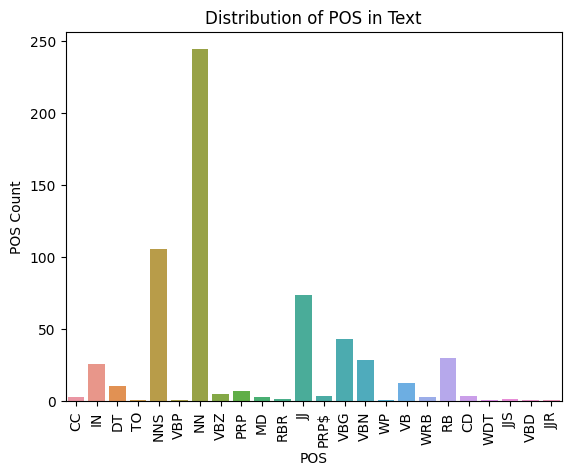

In [234]:
# Create a count plot
sns.countplot(df['POS'])
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('POS')
plt.ylabel('POS Count')
plt.title('Distribution of POS in Text')

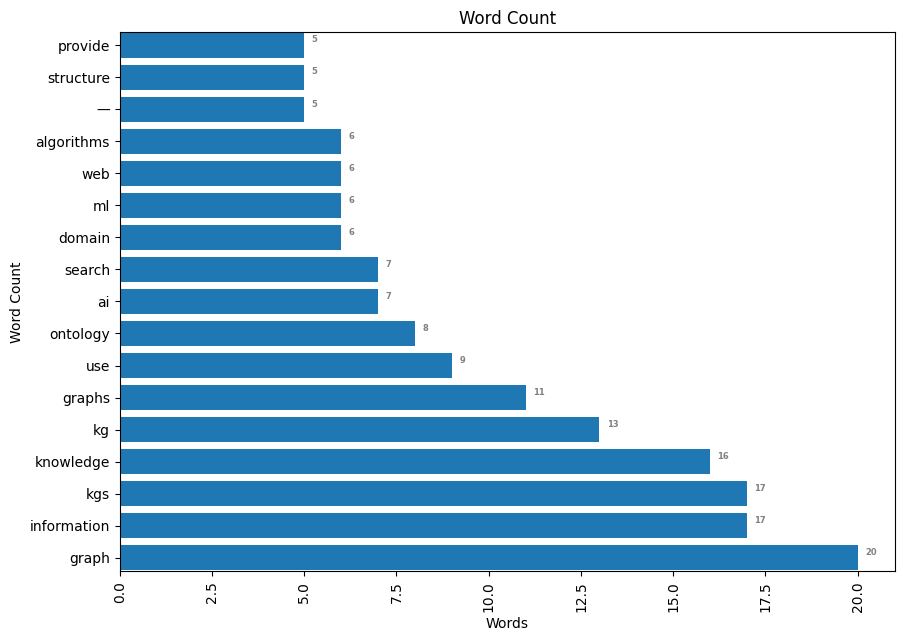

In [235]:
# DISPLAYING UNIQUE WORDS WITH THEIR COUNT
df2 = df[(df['POS'] == 'NN') & (df['WordCount'] >= 5)]

# Figure Size
fig, ax = plt.subplots(figsize=(10, 7))
plt.margins(y=0.001)
plt.xticks(rotation=90)

# Horizontal Bar Plot
ax.barh(df2['Word'], df2['WordCount'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()))),
             fontsize=6, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Word Count')
ax.set(xlabel='Words', ylabel='Word Count')

# Show Plot
plt.show()

Since **kgs** and **kg** are acronyms for **knowledge** **graph** we will update the values  
* knowlegde = 16+17+13
* graph = 20+17+13

Graphs is equal to graph therefore graph count= 20+17+13+11


In [239]:
condition = df2['Word'] == 'knowledge'
df2.loc[condition, 'WordCount'] = (16+17+13)

condition = df2['Word'] == 'graph'
df2.loc[condition, 'WordCount'] = (20+17+13+11)

condition = df2['Word'] == 'kgs'
df2 = df2.drop(df2[condition].index)
condition = df2['Word'] == 'kg'
df2 = df2.drop(df2[condition].index)
condition = df2['Word'] == 'graphs'
df2 = df2.drop(df2[condition].index)

df2.head(15)

,Word,WordCount,POS,Lemma
177,graph,61,NN,graph
100,information,17,NN,information
43,knowledge,46,NN,knowledge
33,use,9,NN,use
234,ontology,8,NN,ontology
52,ai,7,NN,ai
38,search,7,NN,search
400,domain,6,NN,domain
251,ml,6,NN,ml
610,web,6,NN,web


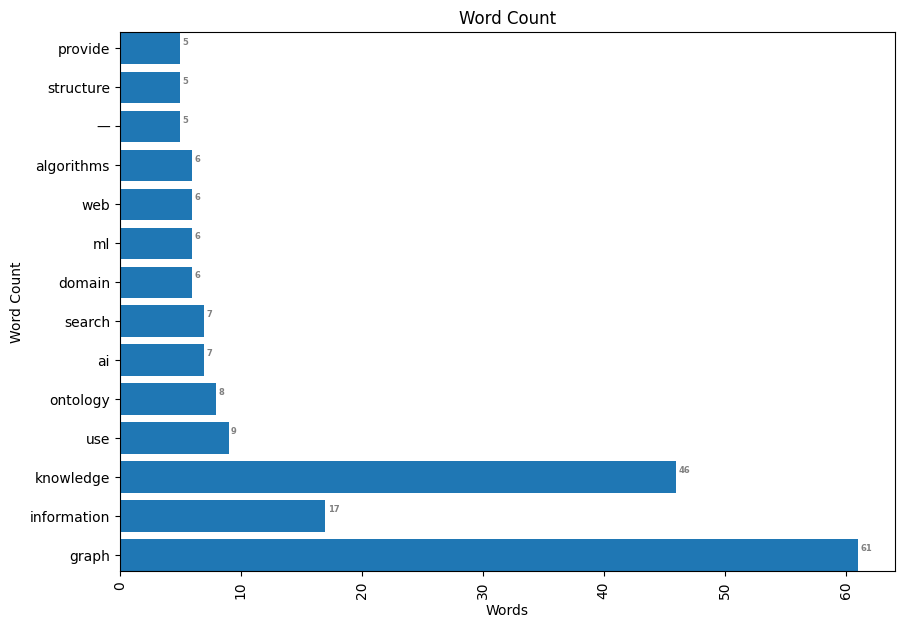

In [240]:
# Figure Size
fig, ax = plt.subplots(figsize=(10, 7))
plt.margins(y=0.001)
plt.xticks(rotation=90)

ax.barh(df2['Word'], df2['WordCount'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()))),
             fontsize=6, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Word Count')
ax.set(xlabel='Words', ylabel='Word Count')

# Show Plot
plt.show()

The first graph which explained that the topic of discussion of the blog was and; and had the greatest Word count.  

With Lemmatization, POS tagging and segeregation we are able to identify what the two majorly spoken words are: knowledge and graph. On reading the blog, our second finding matches the topic of discussion far more accurately than the first.